In [1]:
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [2]:
import pandas as pd
from rpy2.robjects import r, pandas2ri
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pandas2ri.activate()

In [4]:
r['load']("experiment2.rdata")

array(['df.l', 'df.w', 'ls.clips', 'ls.events'], dtype='<U9')

# Heatmaps of mouse locations 

In [5]:
def get_speed(positions):
    positions = positions / 100
    shifted_positions = positions.shift(1).fillna(positions[0])    
    return np.abs((shifted_positions - positions) / s_per_frame)

def get_row_and_col(mouse_data):
    return np.floor(mouse_data / SQUARE_SIZE).astype(int)

def get_grid_heatmap(mouse_data):
    grid_count = mouse_data.groupby(["row", "col"]).size()
        
    sns.heatmap([[grid_count.loc[(row, col)] if grid_count.index.isin([(row, col)]).any() else 0
                   for col in range(NCOLS)] for row in range(NROWS)])
    plt.show()

def get_speed_delta(speed):
    return speed.shift(1).fillna(0) - speed

In [6]:
SQUARE_SIZE = 50
WIDTH = 600
HEIGHT = 400
NROWS = int(np.ceil(HEIGHT / SQUARE_SIZE))
NCOLS = int(np.ceil(WIDTH / SQUARE_SIZE))
s_per_frame = 1/60


participants = []
for participant in tqdm(r['ls.clips']):
    trials = []
    
    for trial in participant:
        if list(trial.idControlledObject.unique()) == ["none"]:
            continue

        mouse_data = trial[["mouseX", "mouseY"]].copy()
        mouse_data[["col", "row"]] = get_row_and_col(mouse_data)
        mouse_data["speed_x"] = get_speed(trial.mouseX)
        mouse_data["speed_y"] = get_speed(trial.mouseY)
        
        mouse_data["delta_vx"] = get_speed_delta(mouse_data.speed_x)
        mouse_data["delta_vy"] = get_speed_delta(mouse_data.speed_y)

        trials.append(mouse_data)
        # get_grid_heatmap(mouse_data)
    
    participants.append(trials)
    break

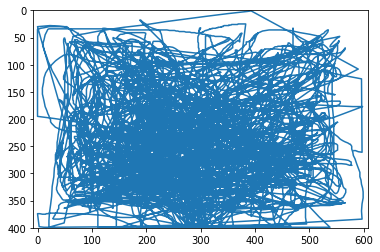

VELOCITY in X


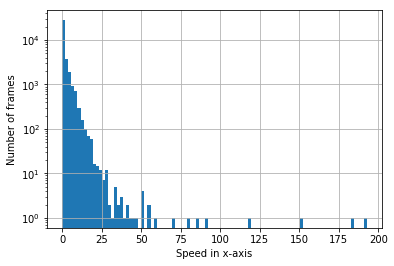

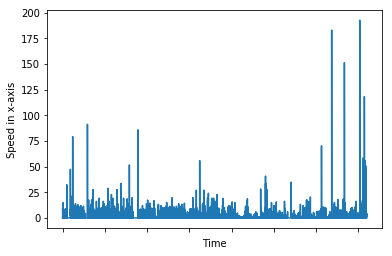

VELOCITY in Y


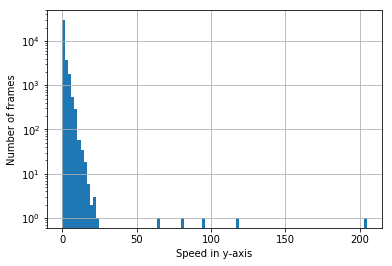

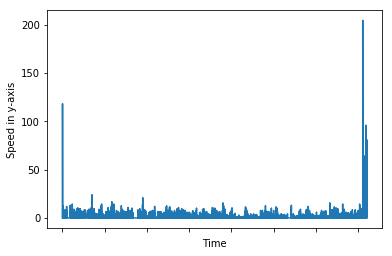

In [7]:
trials = pd.concat(participants[0])

plt.axis('equal')
plt.xlim((0, 600))
plt.ylim((0, 400))
plt.gca().invert_yaxis()
plt.plot(trials.mouseX, trials.mouseY)
plt.show()

print("VELOCITY in X")

# vel_x[vel_x != 0] = np.log(vel_x[vel_x != 0])
trials.speed_x.hist(bins=100, log=True)
plt.ylabel("Number of frames")
plt.xlabel("Speed in x-axis")
plt.show()
trials.speed_x.plot()
plt.xlabel("Time")
plt.ylabel("Speed in x-axis")
plt.show()

print("VELOCITY in Y")

# vel_y[vel_y != 0] = np.log(vel_y[vel_y != 0])
trials.speed_y.hist(bins=100, log=True)
plt.ylabel("Number of frames")
plt.xlabel("Speed in y-axis")
plt.show()
trials.speed_y.plot()
plt.xlabel("Time")
plt.ylabel("Speed in y-axis")
plt.show()